<a href="https://colab.research.google.com/github/jacquelinemlalmeida/unet/blob/main/UNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
!unzip dataset.zip


Archive:  dataset.zip
   creating: dataset/
   creating: dataset/sadios/
   creating: dataset/sadios/train/
   creating: dataset/sadios/train/image/
  inflating: dataset/sadios/train/image/sadios_7.png  
  inflating: dataset/sadios/train/image/sadios_9.png  
  inflating: dataset/sadios/train/image/sadios_6.png  
  inflating: dataset/sadios/train/image/sadios_8.png  
  inflating: dataset/sadios/train/image/sadios_13.png  
  inflating: dataset/sadios/train/image/sadios_1.png  
  inflating: dataset/sadios/train/image/sadios_3.png  
  inflating: dataset/sadios/train/image/sadios_0.png  
  inflating: dataset/sadios/train/image/sadios_10.png  
  inflating: dataset/sadios/train/image/sadios_14.png  
  inflating: dataset/sadios/train/image/sadios_2.png  
  inflating: dataset/sadios/train/image/sadios_11.png  
  inflating: dataset/sadios/train/image/sadios_12.png  
  inflating: dataset/sadios/train/image/sadios_5.png  
  inflating: dataset/sadios/train/image/sadios_4.png  
   creating: dataset/

In [ ]:
!pip install keras-segmentation


     |████████████████████████████████| 3.3MB 6.5MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp36-none-any.whl size=29072 sha256=dcb5bde2592edcfa77b26cfd6c7703850134d613177bcafbfaf6d1232eab3f23
  Stored in directory: /root/.cache/pip/wheels/d0/bb/c0/6aad88b38f6e46db048bed4cccb904a5897055a8ab6fbd4dfc
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


In [ ]:
from keras_segmentation.models.unet import unet_mini
import tensorflow as tf
from keras_segmentation import predict


model = unet_mini(n_classes=2, input_height=360, input_width=480)

model.train(
    train_images =  "dataset/sadios/train/image",
    train_annotations = "dataset/sadios/train/label",
    checkpoints_path = "tmp/unet_mini_1" , epochs=2
)


 20%|██        | 3/15 [00:00<00:00, 19.40it/s]

Verifying training dataset


100%|██████████| 15/15 [00:00<00:00, 18.97it/s]

Dataset verified! 
Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/2
512/512 [==============================] - 73s 143ms/step - loss: 0.3961 - accuracy: 0.9209
Epoch 2/2
512/512 [==============================] - 72s 141ms/step - loss: 0.1133 - accuracy: 0.9769


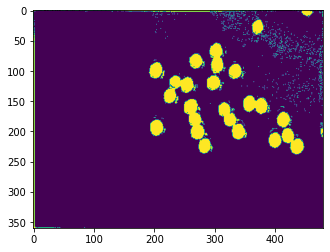

In [ ]:
# Descobri que o LabelMe não gera os arquivos annotations no formato correto para essa biblioteca, não basta passar para escala de cinza, é preciso usar o número de intensidades
# Menor que o número de classes, para uma classe o fundo (conta como uma classe) manteve-se zero e o grão sadio todos os pixels assumiram 1.

out = model.predict_segmentation(
    inp="dataset/sadios/test/GREEN_1_SADIO_7.jpg",
    out_fname="/tmp/out.png"
)

import matplotlib.pyplot as plt
plt.imshow(out)